## Exploring Waste Management dataset

1. Univariate Analysis
2. Bi-variate
3. Multivariate
4. Insight Summary


#### About the Dataset
    Area : Florida
    Name: Collier County
    Date Range: 88 Days (from 24th Dec 2018 to 22nd Mar 2019)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

sns.set(font_scale=1.5)
%matplotlib inline

In [2]:
data = pd.read_csv("mock_data_wm.csv", parse_dates=["CONTAINER_DATE", "CONTAINER_DONE"])

In [3]:
df = data.copy() # copy of data

In [4]:
days = (df["CONTAINER_DONE"].max() - df["CONTAINER_DONE"].min()).days
print(f"Number of days worth of service in dataset : {days}")

Number of days worth of service in dataset : 88


In [5]:
df.head()

ROUTE_ID  TRUCK_ID         LOB     SUBLOB CONTAINER_DATE   LATITUDE  \
0         1         1  COMMERCIAL  Frontload     2019-03-20  26.134610   
1         2         1  COMMERCIAL  Frontload     2019-03-11  26.180647   
2         3         2  COMMERCIAL  Recycling     2019-01-02  26.155766   
3         3         2  COMMERCIAL  Recycling     2019-03-13  26.155591   
4         3         2  COMMERCIAL  Recycling     2019-03-13  26.155591   

   LONGITUDE      CONTAINER_DONE  CUSTOMER_UNIQUEID  ZIPCODE  \
0 -81.719820 2019-03-20 12:51:05        24106402003  2269000   
1 -81.705920 2019-03-11 12:13:08        24111442005   676000   
2 -81.676450 2019-01-02 05:52:08       128454652009  3206000   
3 -81.677403 2019-03-13 05:38:06       128454652009  3206000   
4 -81.677403 2019-03-13 05:40:29       128454652009  3206000   

  CUSTOMER_SERVICE_LEVEL CONTAINER_SIZE  QUANTITY EVENT SERVICE_STATUS HOC  \
0                    4F1             -1       1.0  DONE            POS  NO   
1                    6F2             -1       1.0  DONE            POS  NO   
2                    8Y1             -1       1.0   POS            POS  NO   
3                    8Y1             -1       1.0   POS            POS  NO   
4                    8Y1             -1       1.0   POS            POS  NO   

       HOC_REASON HOC_REASON_CODE  CONTSERIAL  
0  Not Applicable  Not Applicable        1375  
1  Not Applicable  Not Applicable        1542  
2  Not Applicable  Not Applicable        2838  
3  Not Applicable  Not Applicable        2838  
4  Not Applicable  Not Applicable        2838

### Univariate Analysis

#### Categorical Columns  

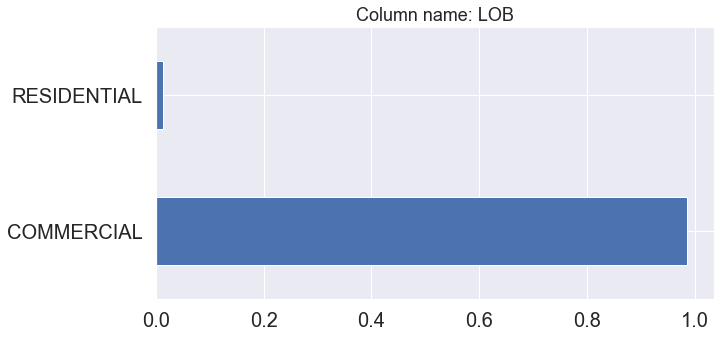

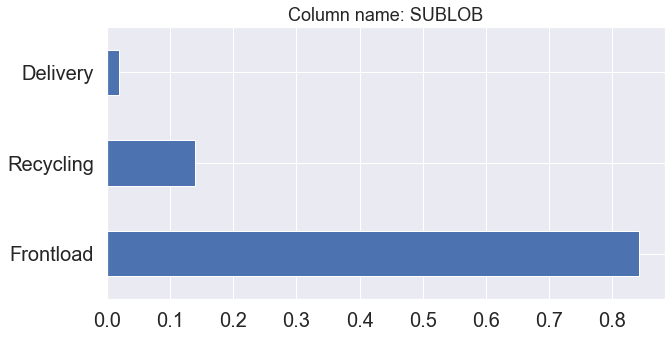

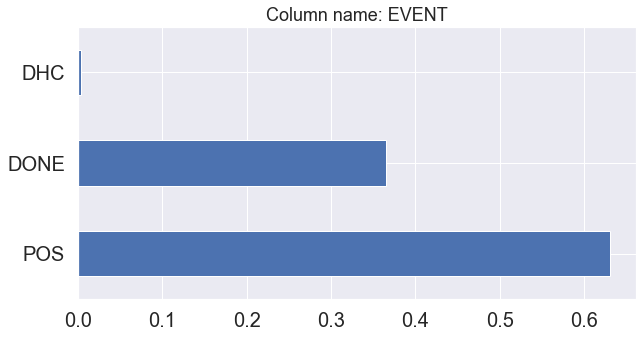

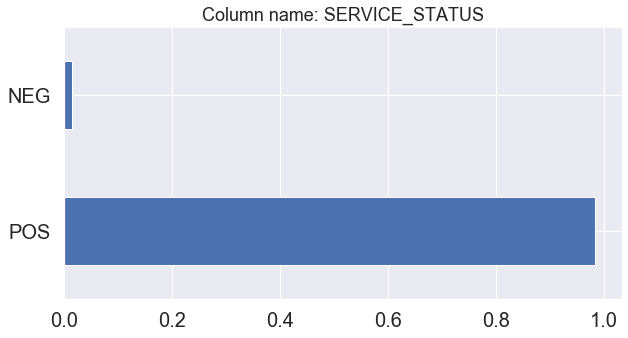

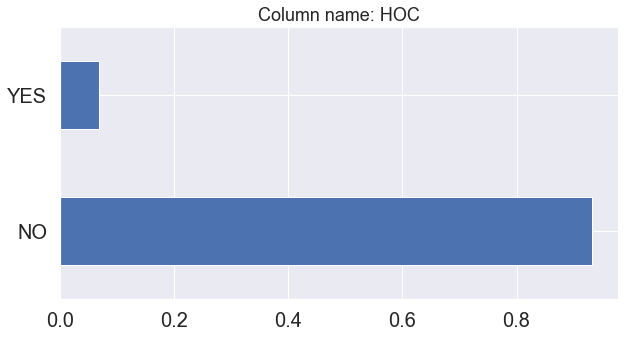

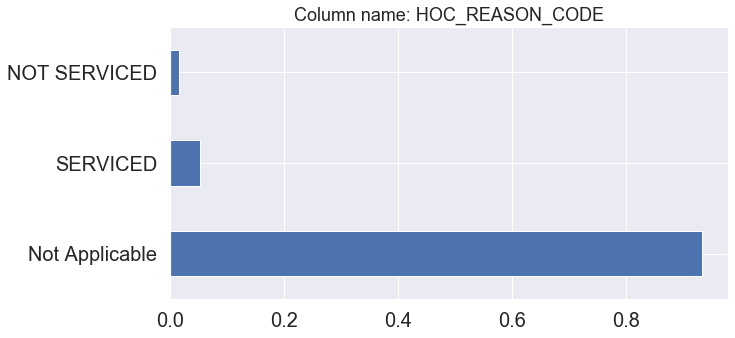

In [6]:
for column in df.select_dtypes("object").columns: # bar plots on categorical data
    vc = df[column].value_counts(normalize=True)
    if vc.count() > 1 and vc.count() < 5:
        plt.figure()
        vc.plot.barh(figsize=(10, 5), fontsize=20)
        plt.title(f"Column name: {column}")

In [9]:
container_count = df["CONTSERIAL"].dropna().drop_duplicates().count()
print(f"Number of containers in the area: {container_count}")

Number of containers in the area: 9659


#### QUANTITY COLUMN

In [10]:
qty_ts = df[["QUANTITY", "CONTAINER_DATE"]].copy()
qty_ts.sort_values(by="CONTAINER_DATE", inplace=True)
qty_ts.set_index("CONTAINER_DATE", inplace=True)
qty_ts = pd.pivot_table(qty_ts, values=["QUANTITY"], index=["CONTAINER_DATE"], aggfunc="sum")#.plot(figsize=(20,10))

In [14]:
print(f"Total quantity served : {int(qty_ts.sum().values[0])}")

Total quantity served : 346427


In [17]:
print(f"Total days served : {qty_ts.count().values[0]}")

Total days served : 76


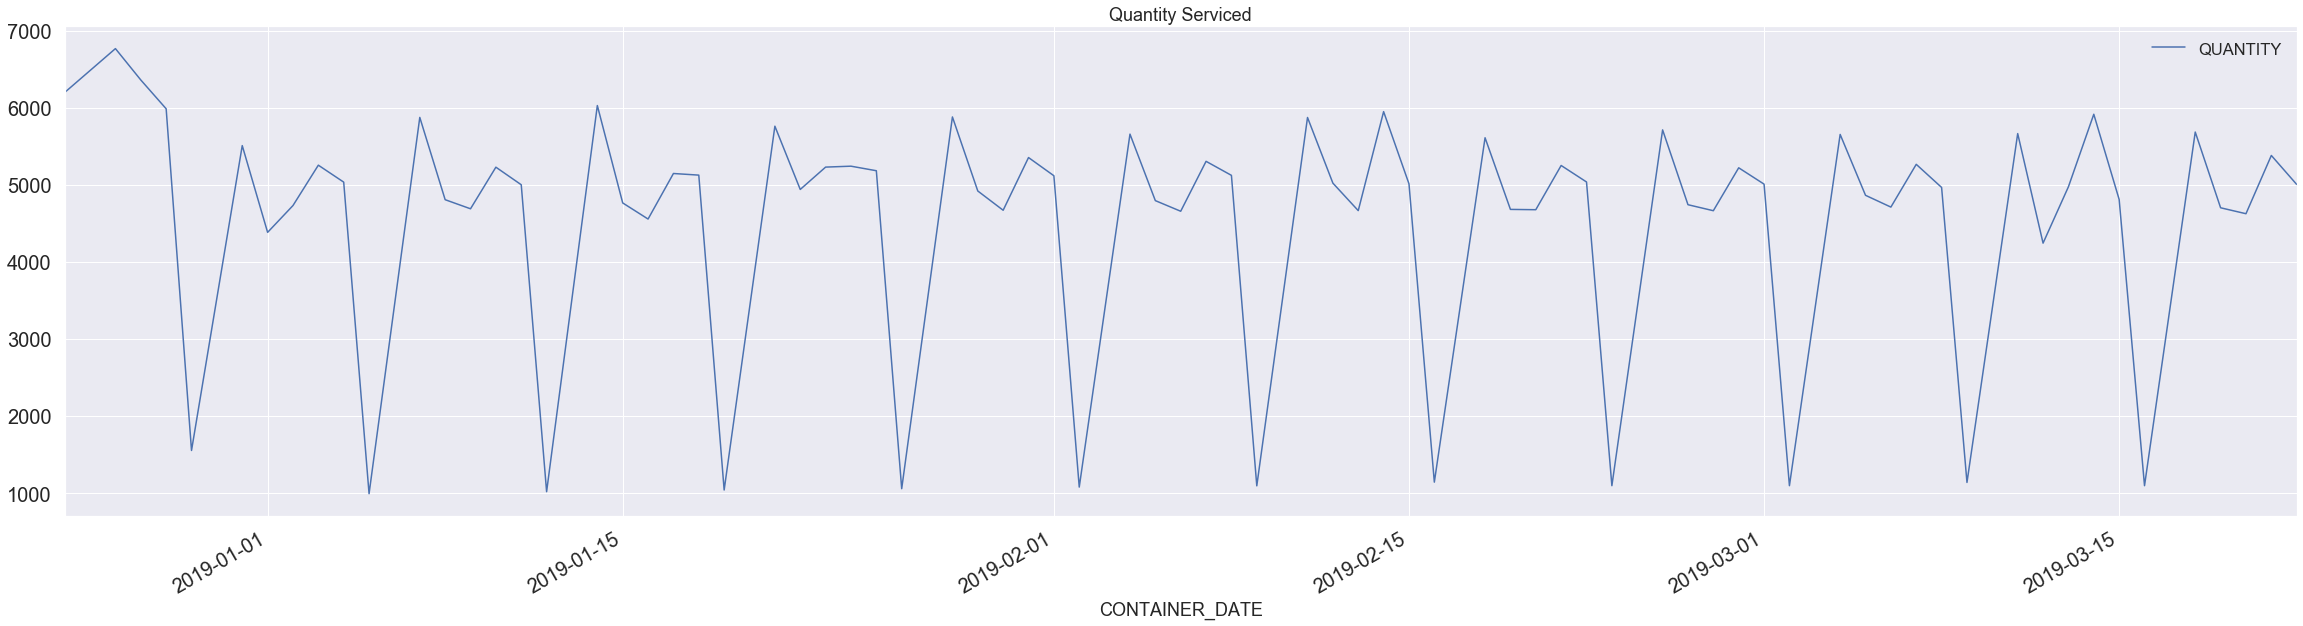

In [18]:
qty_ts.plot(kind="line", figsize=(40, 10), title="Quantity Serviced", fontsize=20)

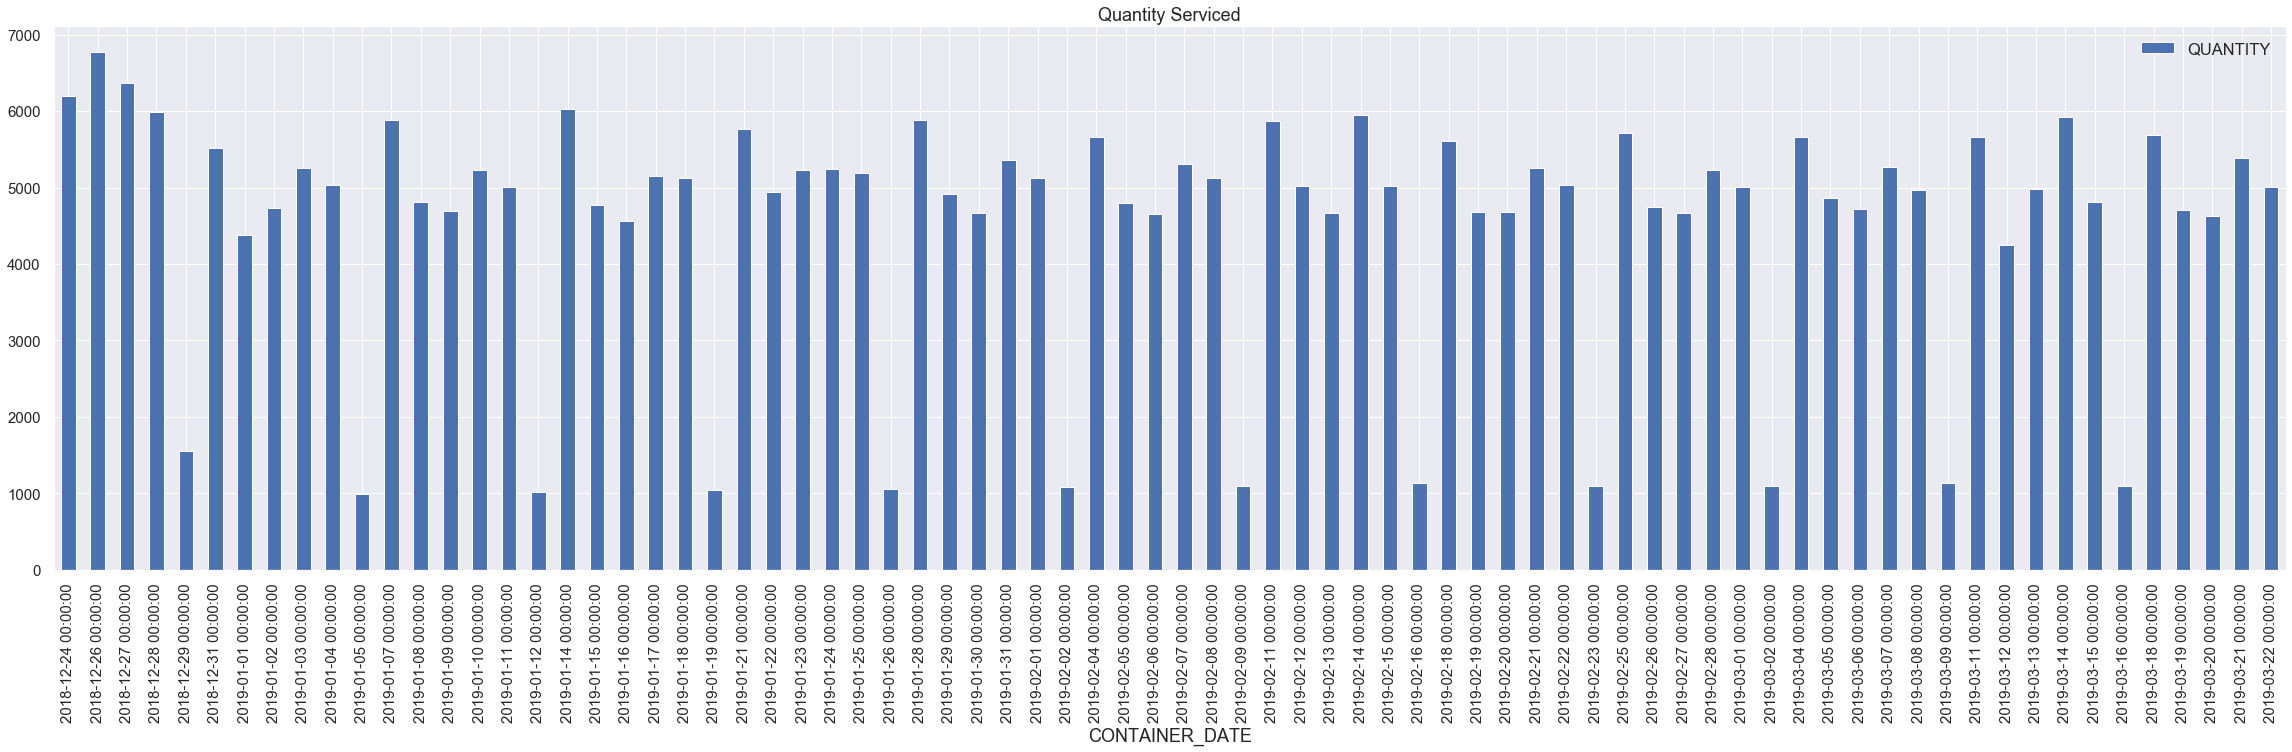

In [19]:
qty_ts.plot(kind="bar", figsize=(40, 10), title="Quantity Serviced", fontsize=15)

*Observation: Clear signs of seasonal trend (weekly) in Quantity*

### Bi-variate Analysis 

#### SUBLOB vs EVENT 

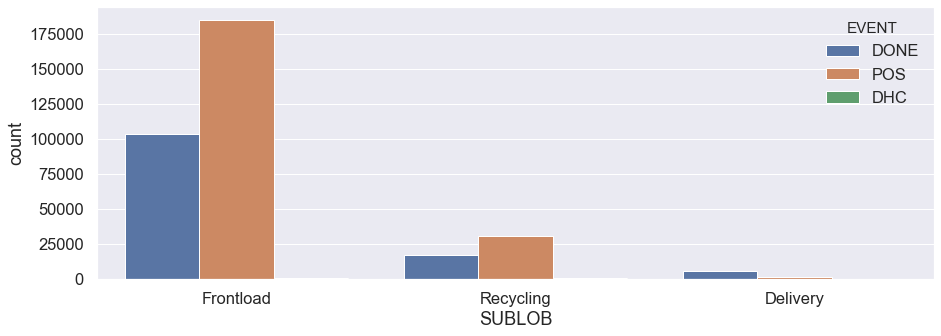

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(x="SUBLOB", hue="EVENT", data=df)

### SERVICE_STATUS vs SUBLOB

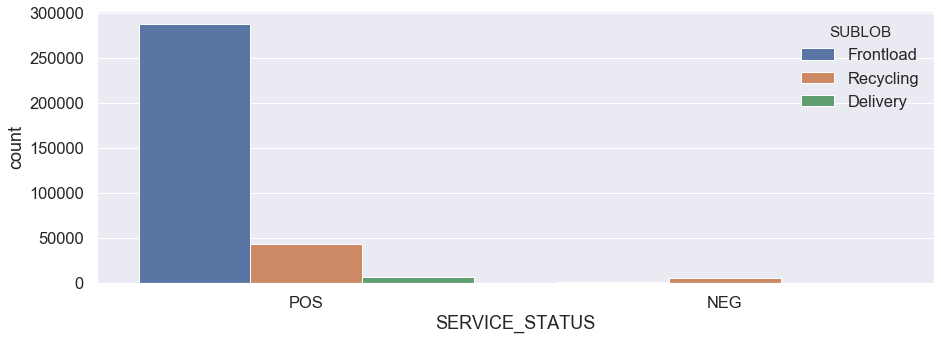

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(x="SERVICE_STATUS", hue="SUBLOB", data=df)

#### Top 10 Customers serviced interms of Trash/Waste Quantity

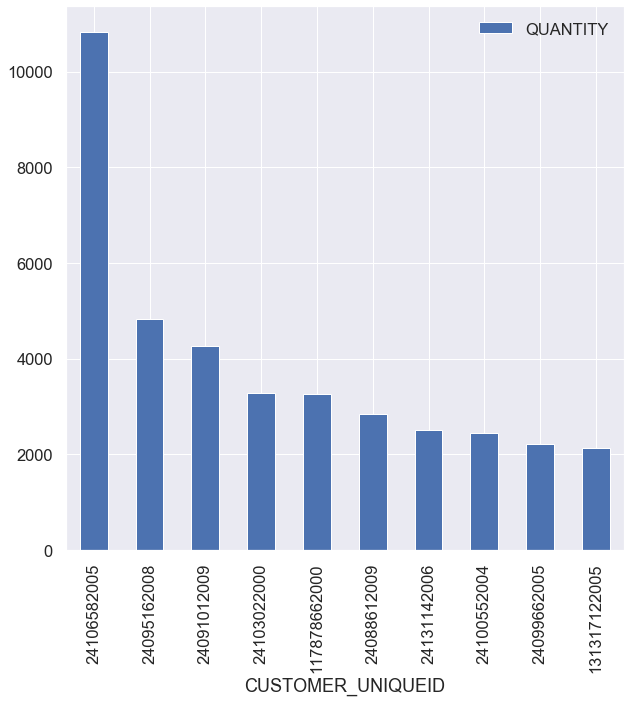

In [22]:
pd.pivot_table(df, values=["QUANTITY"], index=["CUSTOMER_UNIQUEID"], aggfunc="sum").sort_values("QUANTITY", ascending=False).head(10).plot.bar(figsize=(10,10))

#### Top 10 Trucks carrying most number of Wastes/Containers qty accross 88 days

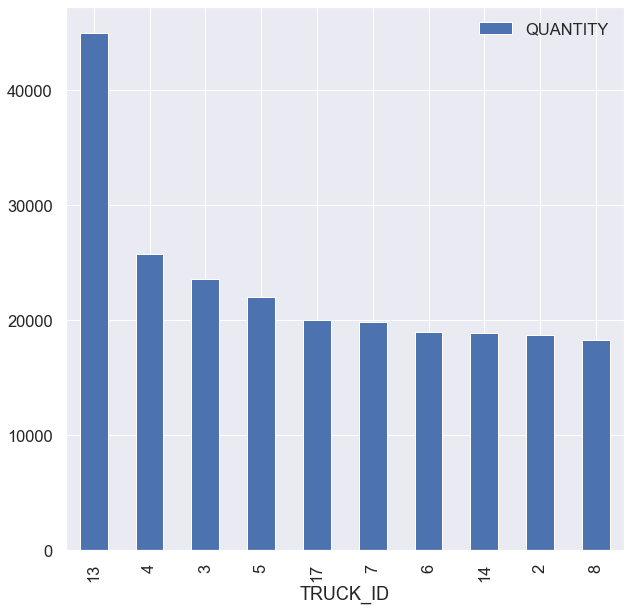

In [23]:
pd.pivot_table(df, values=["QUANTITY"], index=["TRUCK_ID"], aggfunc="sum").sort_values("QUANTITY", ascending=False).head(10).plot.bar(figsize=(10,10))

#### Top 10 Routes with most number of Wastes/Containers by qty accross 88 days

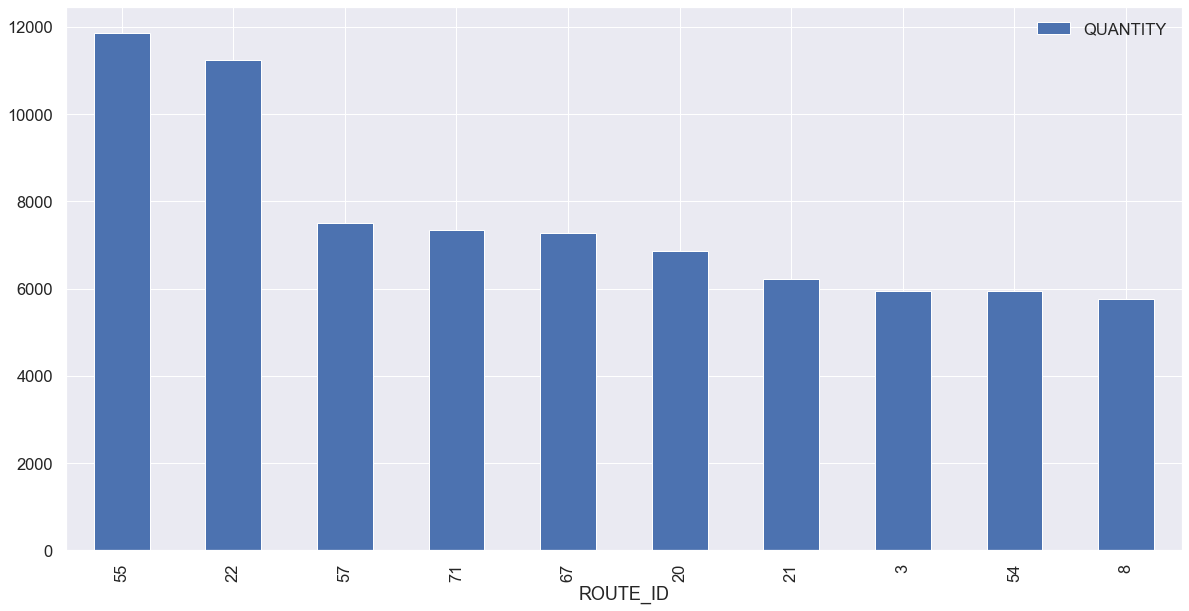

In [24]:
pd.pivot_table(df, values=["QUANTITY"], index=["ROUTE_ID"], aggfunc="sum").sort_values("QUANTITY", ascending=False).head(10).plot.bar(figsize=(20,10))

### CUSTOMERS WITH CONTAMINATED WASTE
#### _FILTER ON HOC - YES_

__HOC - Hall or Call__

In [25]:
hoc = df[df["HOC"]=="YES"].copy()

### TOP REASON FOR HOC - 
    - Overloaded Container
    - Material contaminated waste

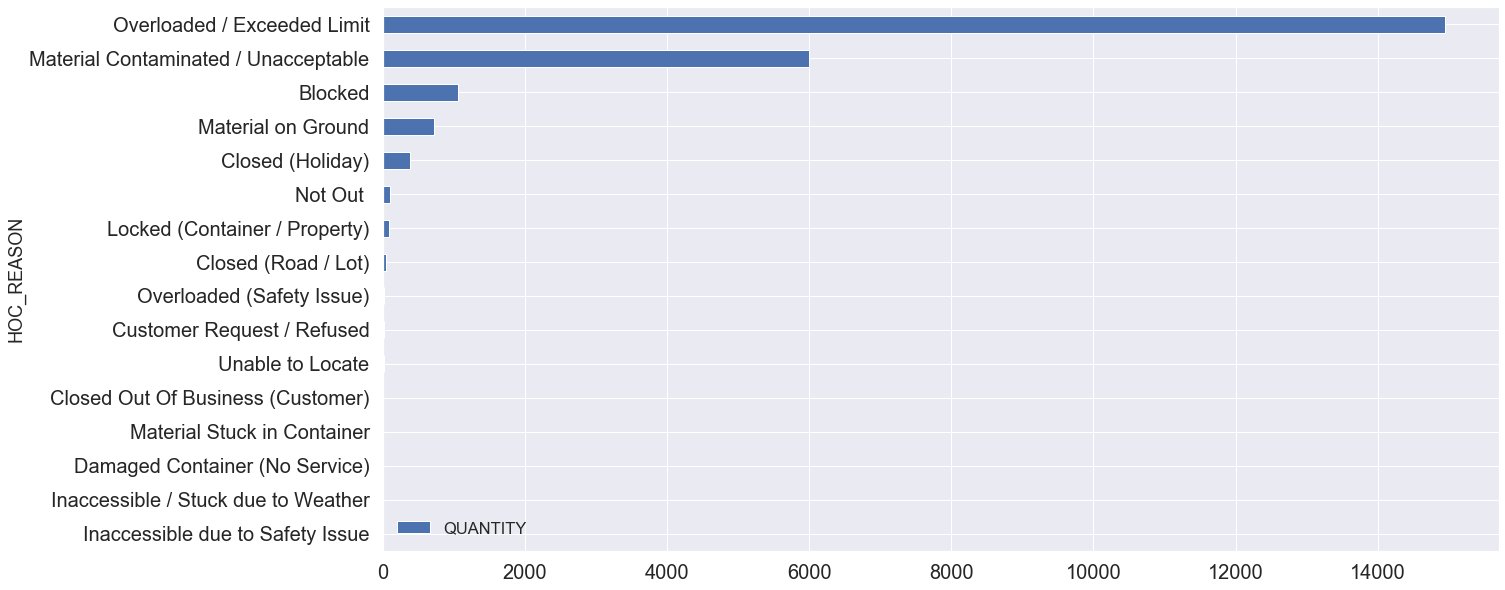

In [26]:
pd.pivot_table(hoc, values=["QUANTITY"], index=["HOC_REASON"], aggfunc="sum").sort_values("QUANTITY", ascending=True).plot.barh(figsize=(20,10), fontsize=20)

#### Service status (HOC REASON Code) at SUBLOB level 

- Commercial Frontload Recycling has the highest rejection rate

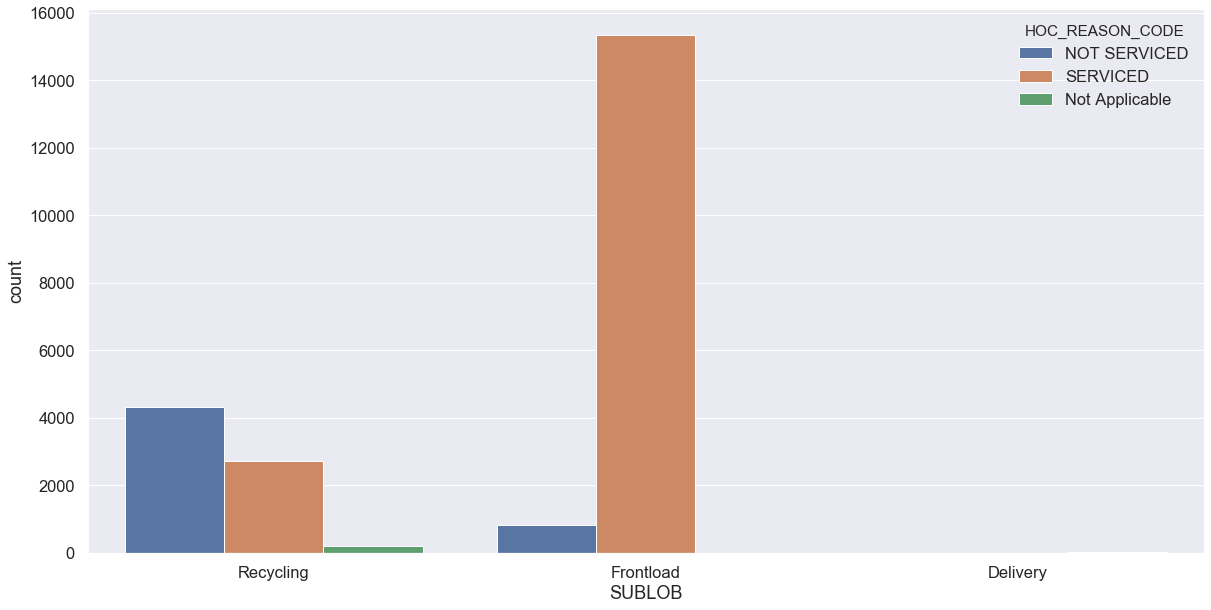

In [27]:
plt.figure(figsize=(20, 10))
sns.countplot(x="SUBLOB", hue="HOC_REASON_CODE", data=hoc)

#### Top reason for HOC - Datewise Sorted by Quantity

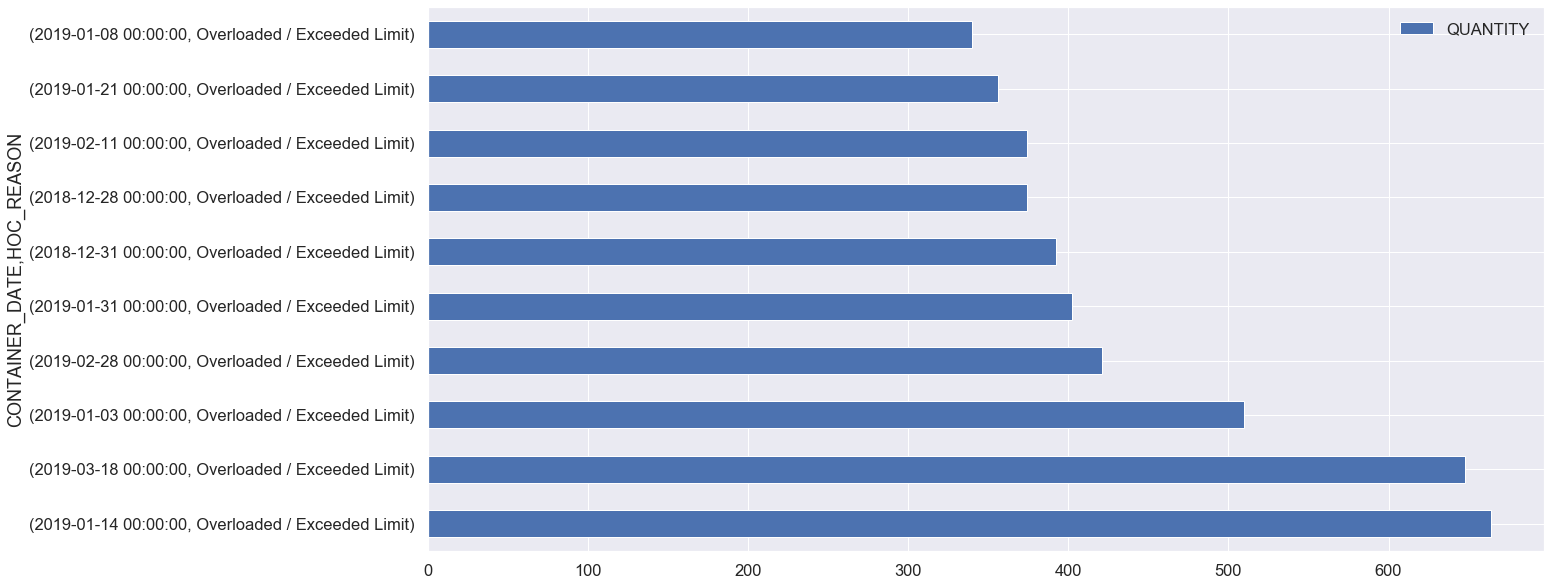

In [28]:
pd.pivot_table(hoc, values=["QUANTITY"], index=["CONTAINER_DATE", "HOC_REASON"], aggfunc="sum").sort_values("QUANTITY", ascending=False).head(10).plot.barh(figsize=(20,10))

In [29]:
hrc = pd.pivot_table(hoc, values=["QUANTITY"], index=["CONTAINER_DONE", "HOC_REASON_CODE", "ZIPCODE"], aggfunc="sum").sort_values("QUANTITY", ascending=False)

#### Top 10 Zipcodes of Waste Contamination Defaulters 

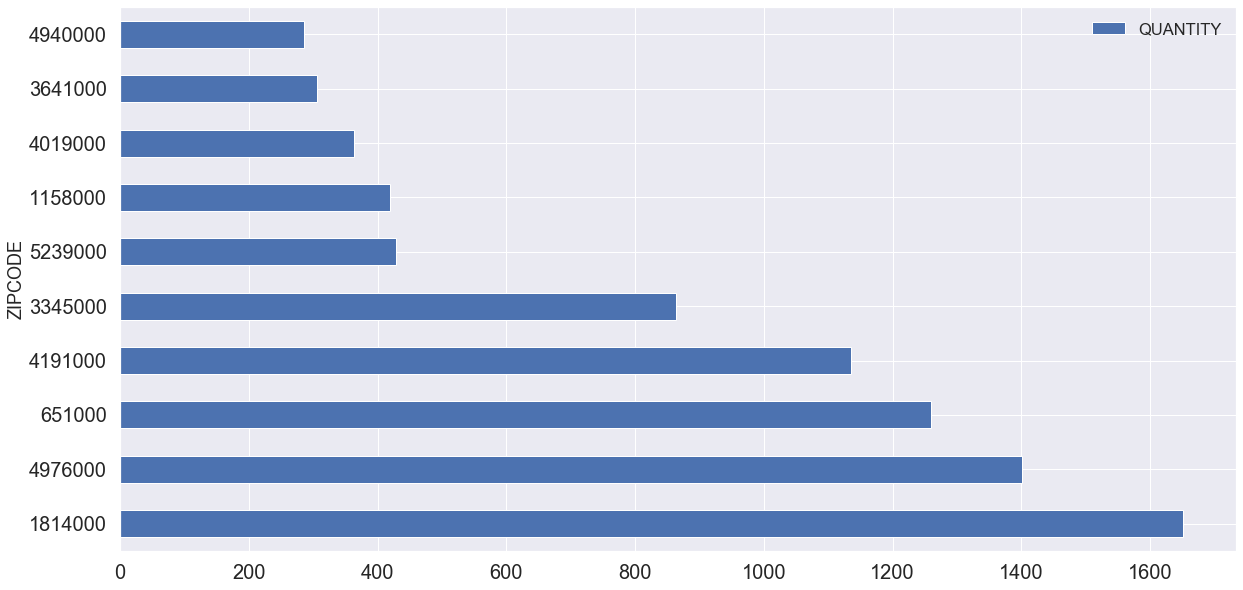

In [30]:
hrc.reset_index().groupby("ZIPCODE").sum().sort_values("QUANTITY", ascending=False).head(10).plot.barh(figsize=(20,10), fontsize=20)

#### Top 5 HOC reasons along with Quantity categorized based on SUBLOB

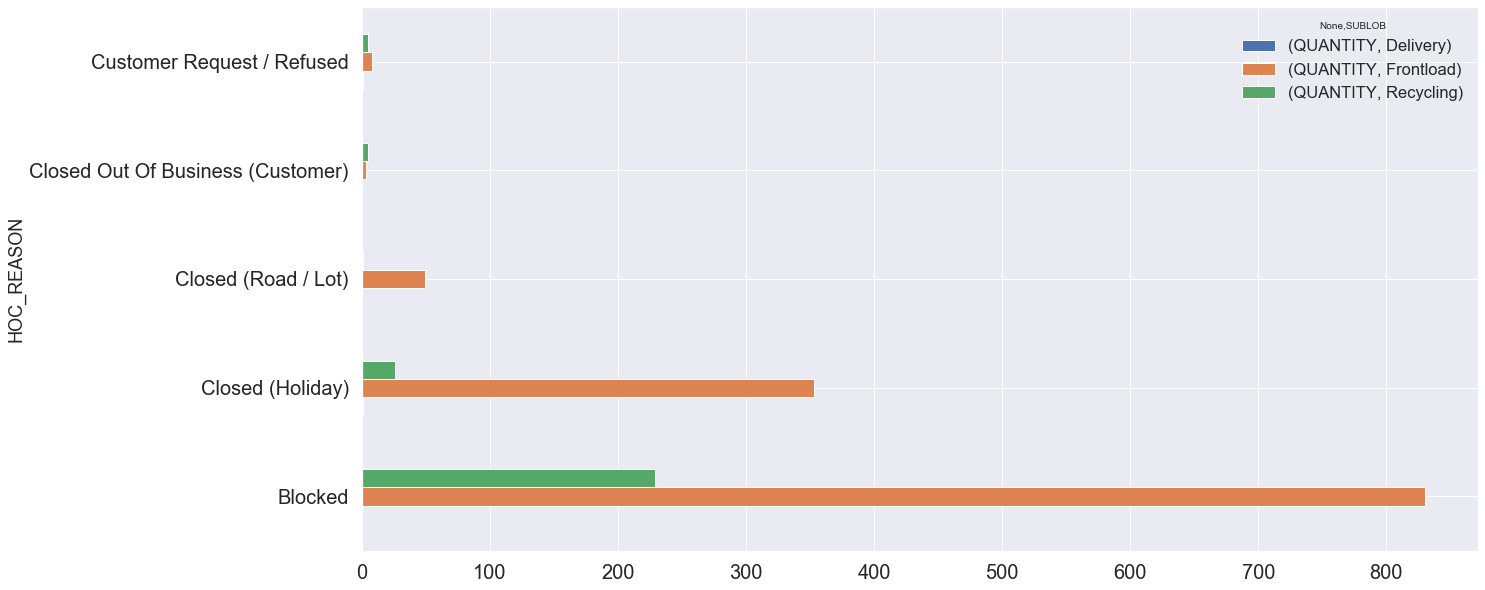

In [32]:
pd.pivot_table(hoc, values=["QUANTITY"], index=["HOC_REASON"], columns=["SUBLOB"], aggfunc="sum").head().plot.barh(figsize=(20,10), fontsize=20)

#### Top 5 HOC Reason Code along with Quantity categorized based on SUBLOB

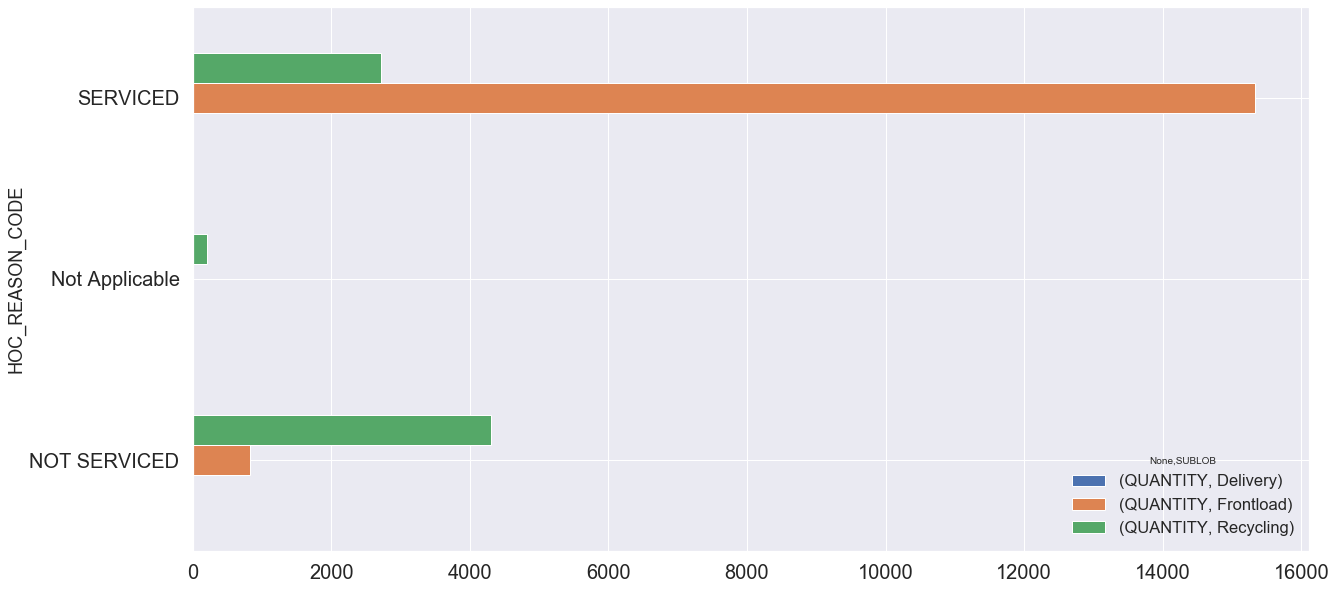

In [33]:
pd.pivot_table(hoc, values=["QUANTITY"], index=["HOC_REASON_CODE"], columns=["SUBLOB"], aggfunc="sum").head().plot.barh(figsize=(20,10), fontsize=20)

The End